# PCA - Principal Component Analisys - Redução de Dimensionalidade

## Passos Principais - PCA -  principal component analysis

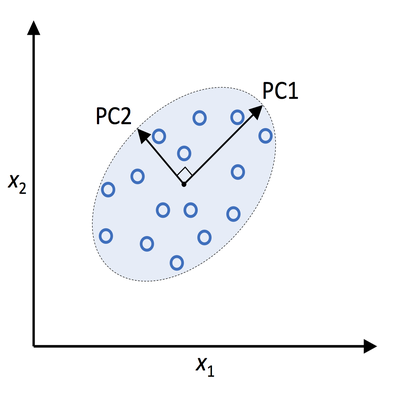

In [1]:
from PIL import Image
img = Image.open('image01.png') #, width=400) 
width  = 400
height = 400
img = img.resize((width, height), Image.ANTIALIAS)
img

## Extraindo os componentes principais passo-a-passo 

In [5]:
import pandas as pd

df_wine = pd.read_csv('wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

print(len(df_wine))
df_wine.head()

178


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df_wine['Class label'].unique()

array([1, 2, 3])

In [3]:
print('Número de dimensões:', len(df_wine.columns)-1)

Número de dimensões: 13


In [8]:
# conta o número de ocorrencia de cada classe
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

### Splitting de dados: 70% treino e 30% teste

In [9]:
from sklearn.model_selection import train_test_split

X= df_wine.iloc[:, 1:].values 
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [10]:
import numpy as np
np.set_printoptions(suppress=True)
X_train[:3]

array([[  13.62,    4.95,    2.35,   20.  ,   92.  ,    2.  ,    0.8 ,
           0.47,    1.02,    4.4 ,    0.91,    2.05,  550.  ],
       [  13.76,    1.53,    2.7 ,   19.5 ,  132.  ,    2.95,    2.74,
           0.5 ,    1.35,    5.4 ,    1.25,    3.  , 1235.  ],
       [  13.73,    1.5 ,    2.7 ,   22.5 ,  101.  ,    3.  ,    3.25,
           0.29,    2.38,    5.7 ,    1.19,    2.71, 1285.  ]])

In [11]:
y_train[:3]

array([3, 1, 1])

### Colocando o dado em Escala (Normalizando)

In [13]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [12]:
X_train.min(), X_train.max()

(0.13, 1680.0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
X_train_std.min(), X_train_std.max()

(-2.55493448916567, 3.6932366525105946)

In [16]:
X_train_std[:3]

array([[ 0.71225893,  2.22048673, -0.13025864,  0.05962872, -0.50432733,
        -0.52831584, -1.24000033,  0.84118003, -1.05215112, -0.29218864,
        -0.20017028, -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, -0.09065504,  2.34147876,
         1.01675879,  0.66299475,  1.0887425 , -0.49293533,  0.13152077,
         1.33982592,  0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605,  0.81104754,  0.13597904,
         1.09807851,  1.16326665, -0.64419483,  1.25249578,  0.25863359,
         1.06806189,  0.1308109 ,  1.62934866]])

## A matriz de  covariância
Covariância, ou variância conjunta, é uma medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis aleatórias. 
Assim, variáveis independentes têm covariância zero. <br />
A covariância é por vezes chamada de medida de dependência linear entre as duas variáveis aleatórias. <br />
O Coeficiente de Correlação Linear é um conceito relacionado usado para medir o grau de dependência linear entre duas variáveis, variando entre -1 e 1, indicando o sentido da dependência.

### A covariância mede a relação linear entre duas variáveis. <br> A correlação mede tanto a força como a direção da relação linear entre duas variáveis

<img src="MatrizDeCovariancia.png">
<img src="cov.png">

In [17]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [18]:
len(cov_mat)

13

In [19]:
cov_mat[:3]

array([[ 1.00813008,  0.06709556,  0.17405351, -0.35439069,  0.26374703,
         0.29079481,  0.21835807, -0.08111974,  0.10436705,  0.54282846,
         0.05893536, -0.01797029,  0.6415292 ],
       [ 0.06709556,  1.00813008,  0.08326463,  0.26356776, -0.11349172,
        -0.33735555, -0.41035281,  0.33653916, -0.21602672,  0.17504154,
        -0.551593  , -0.40561695, -0.24089991],
       [ 0.17405351,  0.08326463,  1.00813008,  0.46420355,  0.29092834,
         0.18020384,  0.15537535,  0.15918823, -0.00703776,  0.20549146,
         0.00665422,  0.02039019,  0.223495  ]])

In [20]:
cov_mat.shape

(13, 13)

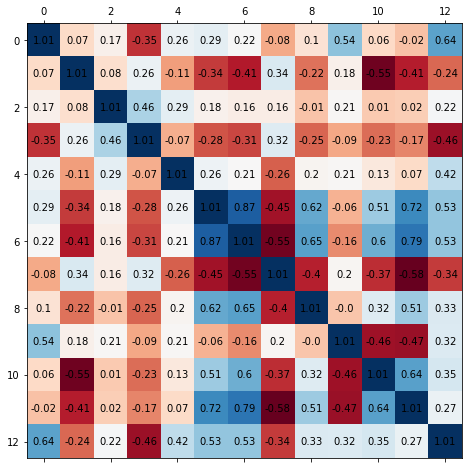

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

#plt.figure(figsize=(12,8))

#plt.rcParams["figure.figsize"] = [16,9]

np.set_printoptions(precision=2, suppress=True)

#min_val, max_val = 0, 15

min_val, max_val = np.min(cov_mat), np.max(cov_mat)
num_atributos = cov_mat.shape[0]

ax.matshow(cov_mat, cmap=plt.cm.RdBu) # plt.cm.Blues

for i in range(num_atributos):
    for j in range(num_atributos):
        c = cov_mat[i][j]
        c = float("%.2f" % c) 
        #ax.text(i+0.5, j+0.5, str(c), va='center', ha='center')
        ax.text(i, j, str(c), va='center', ha='center')

## Decomposição da matriz de covariância em AutoVetores (eingenvectors)

Os eigenvectors (Autovetores) da matriz de covariância, representam os Componentes Principais, que são as direções de máxima variância.<br />
Os eingenvalues, que são os Autovalores, são valores associados com os Autovetores v, definem a magnitude.

In [23]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nAutovalores \n%s' % eigen_vals)


Autovalores 
[4.84 2.42 1.55 0.96 0.84 0.66 0.52 0.35 0.31 0.11 0.21 0.15 0.18]


In [26]:
print('\nAutovetores \n%s' % eigen_vecs[:2])


Autovetores 
[[-0.14  0.5  -0.14 -0.   -0.29  0.3   0.08 -0.37 -0.4  -0.09  0.37 -0.13
   0.26]
 [ 0.25  0.16  0.1   0.56  0.09  0.63 -0.27 -0.01  0.11  0.03 -0.14  0.08
  -0.27]]


## Total e variância explicada 

In [27]:
tot = sum(eigen_vals)
tot

13.105691056910558

In [28]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print("variância explica de de cada componente\n", var_exp)

variância explica de de cada componente
 [0.3695146859960764, 0.18434927059884165, 0.11815159094596984, 0.07334251763785457, 0.06422107821731668, 0.05051724484907669, 0.03954653891241447, 0.026439183169220056, 0.023893192591852935, 0.016296137737251044, 0.013800211221948414, 0.011722262443086015, 0.008206085679091372]


In [29]:
sum(var_exp)

1.0000000000000002

In [30]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.37, 0.55, 0.67, 0.75, 0.81, 0.86, 0.9 , 0.93, 0.95, 0.97, 0.98,
       0.99, 1.  ])

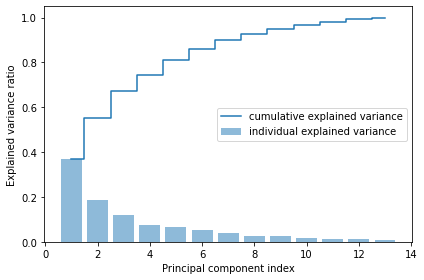

In [31]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp,alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
print("variância explica de de cada componente\n", var_exp)

variância explica de de cada componente
 [0.3695146859960764, 0.18434927059884165, 0.11815159094596984, 0.07334251763785457, 0.06422107821731668, 0.05051724484907669, 0.03954653891241447, 0.026439183169220056, 0.023893192591852935, 0.016296137737251044, 0.013800211221948414, 0.011722262443086015, 0.008206085679091372]


## Feature transformation - Criação de pares (AutoValores, AutoVetores)

In [33]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [34]:
print('AutoValor - AutoVetor associado')
eigen_pairs[0:2]

AutoValor - AutoVetor associado


[(4.8427453156558915,
  array([-0.14,  0.25, -0.03,  0.21, -0.15, -0.39, -0.42,  0.31, -0.31,
          0.08, -0.33, -0.37, -0.3 ])),
 (2.4160245870352237,
  array([ 0.5 ,  0.16,  0.24, -0.11,  0.29,  0.05, -0.02,  0.09,  0.01,
          0.55, -0.21, -0.25,  0.38]))]

## Matriz de transformação w (transformando para 2 dimensões)

In [35]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix Transformação W:\n', w)

Matrix Transformação W:
 [[-0.14  0.5 ]
 [ 0.25  0.16]
 [-0.03  0.24]
 [ 0.21 -0.11]
 [-0.15  0.29]
 [-0.39  0.05]
 [-0.42 -0.02]
 [ 0.31  0.09]
 [-0.31  0.01]
 [ 0.08  0.55]
 [-0.33 -0.21]
 [-0.37 -0.25]
 [-0.3   0.38]]


In [36]:
X_train_std[0]

array([ 0.71,  2.22, -0.13,  0.06, -0.5 , -0.53, -1.24,  0.84, -1.05,
       -0.29, -0.2 , -0.82, -0.63])

In [37]:
X_train_std[0].dot(w)

array([2.38, 0.45])

## tranformando 13 dimensões (atributos) em 2 dimensões (atributos)

In [39]:
X_train_std[:]

array([[ 0.71,  2.22, -0.13, ..., -0.2 , -0.82, -0.63],
       [ 0.88, -0.7 ,  1.18, ...,  1.34,  0.55,  1.48],
       [ 0.85, -0.73,  1.18, ...,  1.07,  0.13,  1.63],
       ...,
       [ 1.03,  2.3 , -0.58, ..., -1.69, -1.86, -1.04],
       [-1.3 , -1.08, -0.32, ...,  0.16,  0.74,  0.4 ],
       [-0.41,  1.3 ,  0.06, ...,  1.07,  0.74, -0.9 ]])

In [40]:
X_train_std.shape

(124, 13)

In [42]:
X_train_pca = X_train_std.dot(w)
X_train_pca[:]

array([[ 2.38,  0.45],
       [-1.97,  1.65],
       [-2.54,  1.03],
       [-1.43,  0.6 ],
       [ 3.14,  0.66],
       [ 0.5 , -2.09],
       [ 0.05, -2.28],
       [ 2.48, -0.09],
       [ 2.02, -1.35],
       [ 0.75, -2.55],
       [ 0.72, -1.18],
       [-3.  ,  0.95],
       [ 2.58, -1.07],
       [ 3.73,  1.02],
       [-1.12,  0.14],
       [ 2.86,  2.29],
       [-0.75, -3.22],
       [-1.58,  0.16],
       [ 3.39,  2.12],
       [ 3.15,  0.54],
       [-1.28, -1.73],
       [-1.71,  0.72],
       [-1.55, -1.76],
       [ 1.11, -1.2 ],
       [-0.69, -1.71],
       [-2.09, -1.68],
       [ 2.9 ,  1.95],
       [-2.08,  1.47],
       [-1.75, -1.26],
       [ 2.59, -0.11],
       [-2.5 ,  0.7 ],
       [-2.19,  2.19],
       [ 3.92,  0.16],
       [-1.12,  0.52],
       [-0.9 , -2.05],
       [-1.71,  0.61],
       [-2.49,  0.77],
       [-0.76, -1.68],
       [ 2.93,  0.19],
       [ 2.94,  1.35],
       [-2.39,  1.08],
       [ 2.64,  0.75],
       [ 2.51,  2.25],
       [ 3.

## Plotando as 2 dimensões (PC1, PC2) e os classes (labels)

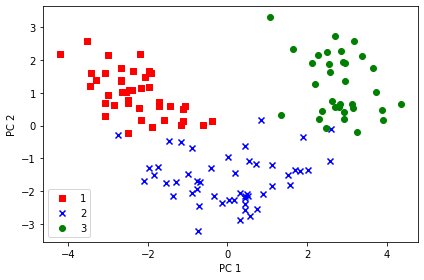

In [43]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Principal component analysis (Pacote scikit-learn)

In [44]:
np.set_printoptions(precision=2)
print("Método 1 (Manual): variância explicada de cada componente\n", np.array(var_exp)) #("%.2f" % var_exp) )

Método 1 (Manual): variância explicada de cada componente
 [0.37 0.18 0.12 0.07 0.06 0.05 0.04 0.03 0.02 0.02 0.01 0.01 0.01]


In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
print("Método 2 (sklearn):Variância explicada de cada dimensão\n",pca.explained_variance_ratio_)

Método 2 (sklearn):Variância explicada de cada dimensão
 [0.37 0.18 0.12 0.07 0.06 0.05 0.04 0.03 0.02 0.02 0.01 0.01 0.01]


In [46]:
np.sum(pca.explained_variance_ratio_)

1.0000000000000002

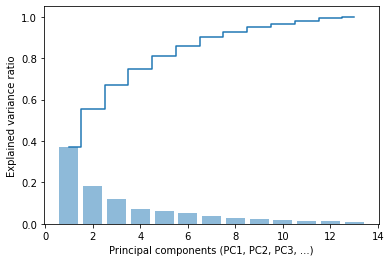

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components (PC1, PC2, PC3, ...)')

plt.show()

## PCA - transformando em 2 componentes

In [48]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print('Variância Explicada:\nPC1 = ',pca.explained_variance_ratio_[0], ', PC2 = ',pca.explained_variance_ratio_[1])

Variância Explicada:
PC1 =  0.36951468599607695 , PC2 =  0.184349270598841


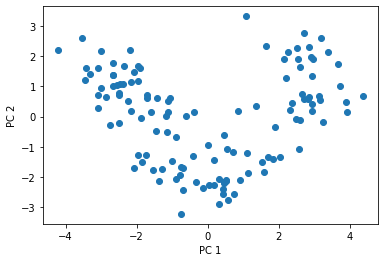

In [49]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [50]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend(loc='lower left')
    plt.tight_layout()

## Treinando um Classificador de Regressão Logística - 2 Componentes Principais (PC1, PC2) 

In [51]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print('Variância Explicada:\nPC1 = ',pca.explained_variance_ratio_[0], ', PC2 = ',pca.explained_variance_ratio_[1])

Variância Explicada:
PC1 =  0.36951468599607695 , PC2 =  0.184349270598841


In [53]:
print("X Original:\n",X_train_std[:2])
print("X Transformado (PC1, PC2):\n",X_train_pca[:])

X Original:
 [[ 0.71  2.22 -0.13  0.06 -0.5  -0.53 -1.24  0.84 -1.05 -0.29 -0.2  -0.82
  -0.63]
 [ 0.88 -0.7   1.18 -0.09  2.34  1.02  0.66  1.09 -0.49  0.13  1.34  0.55
   1.48]]
X Transformado (PC1, PC2):
 [[ 2.38  0.45]
 [-1.97  1.65]
 [-2.54  1.03]
 [-1.43  0.6 ]
 [ 3.14  0.66]
 [ 0.5  -2.09]
 [ 0.05 -2.28]
 [ 2.48 -0.09]
 [ 2.02 -1.35]
 [ 0.75 -2.55]
 [ 0.72 -1.18]
 [-3.    0.95]
 [ 2.58 -1.07]
 [ 3.73  1.02]
 [-1.12  0.14]
 [ 2.86  2.29]
 [-0.75 -3.22]
 [-1.58  0.16]
 [ 3.39  2.12]
 [ 3.15  0.54]
 [-1.28 -1.73]
 [-1.71  0.72]
 [-1.55 -1.76]
 [ 1.11 -1.2 ]
 [-0.69 -1.71]
 [-2.09 -1.68]
 [ 2.9   1.95]
 [-2.08  1.47]
 [-1.75 -1.26]
 [ 2.59 -0.11]
 [-2.5   0.7 ]
 [-2.19  2.19]
 [ 3.92  0.16]
 [-1.12  0.52]
 [-0.9  -2.05]
 [-1.71  0.61]
 [-2.49  0.77]
 [-0.76 -1.68]
 [ 2.93  0.19]
 [ 2.94  1.35]
 [-2.39  1.08]
 [ 2.64  0.75]
 [ 2.51  2.25]
 [ 3.65  1.75]
 [-2.65  1.02]
 [ 0.53 -2.14]
 [ 2.7   0.56]
 [ 3.18  2.58]
 [ 1.13 -1.85]
 [ 2.92  0.42]
 [-1.96 -1.29]
 [ 0.54 -1.08]
 [-0.77 -1.9

In [54]:
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
lr

LogisticRegression()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


train values


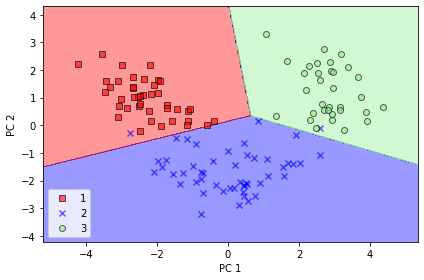

In [55]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
print('train values')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


test values


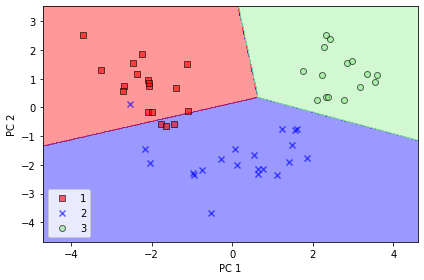

In [56]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
print('test values')
plt.show()

In [57]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37, 0.18, 0.12, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.02, 0.01,
       0.01, 0.01])

In [58]:
pca

PCA()

In [59]:
sum(pca.explained_variance_ratio_)

1.0

<br>
<br>

# PCA - Consumo de Alimentos no Reino Unido

In [60]:
import pandas as pd

In [61]:
dfUK = pd.read_excel('Food.xlsx')
df = dfUK.copy()
df

,FoodConsumption,England,Wales,Scotland,N_Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


In [62]:
foods = df['FoodConsumption']
foods = foods.values
foods

array(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype=object)

In [63]:
len(foods)

17

In [64]:
del df['FoodConsumption']
df

,England,Wales,Scotland,N_Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209
5,156,175,147,139
6,720,874,566,1033
7,253,265,171,143
8,488,570,418,355
9,198,203,220,187


In [65]:
countries = df.columns
countries

Index(['England', 'Wales', 'Scotland', 'N_Ireland'], dtype='object')

### Obtem a matriz transporta para manipulação dos dados

In [66]:
df2 = df.T
df2.columns = foods
df2

,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N_Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [67]:
df2.columns

Index(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype='object')

In [68]:
data = df2.values
data

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

## colocar os dados em escala

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(data.astype(float))
X_std

array([[ 0.66, -0.02, -0.26,  0.64, -0.63,  0.13, -0.45,  0.86,  0.38,
        -0.34,  0.81,  0.74, -0.64, -0.05, -0.44,  0.1 , -0.14],
       [ 0.54, -1.28,  1.2 ,  1.15,  1.54,  1.55,  0.44,  1.09,  1.4 ,
         0.08,  1.17,  0.93,  1.68,  1.61, -1.4 ,  0.84,  0.97],
       [ 0.54, -0.23,  0.54, -0.33, -1.1 , -0.54, -1.34, -0.71, -0.5 ,
         1.51, -0.88, -0.06, -0.86, -0.47,  1.19,  0.72,  0.75],
       [-1.73,  1.52, -1.48, -1.46,  0.19, -1.14,  1.35, -1.25, -1.28,
        -1.26, -1.1 , -1.61, -0.18, -1.09,  0.65, -1.66, -1.58]])

## PCA - Converter 17 dimensões (atributos) em 1 dimensão

In [70]:
from sklearn.decomposition import PCA
pca = PCA(1) # somente 1 dimensão
X_std = data
X_pca = pca.fit_transform(X_std)
print('Variância Explicada:\n', pca.explained_variance_ratio_)

Variância Explicada:
 [0.67]


In [71]:
X_pca

array([[-144.99],
       [-240.53],
       [ -91.87],
       [ 477.39]])

In [72]:
dfpca = pd.DataFrame() 
dfpca['PC1'] = X_pca.ravel()
dfpca['Country'] = countries
dfpca

,PC1,Country
0,-144.993152,England
1,-240.529148,Wales
2,-91.869339,Scotland
3,477.391639,N_Ireland


In [73]:
dfpca2 = dfpca.sort_values('PC1')
dfpca2 = dfpca2.reset_index(drop=True)
dfpca2

,PC1,Country
0,-240.529148,Wales
1,-144.993152,England
2,-91.869339,Scotland
3,477.391639,N_Ireland


## Plota 

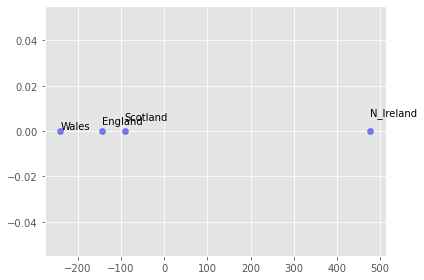

In [74]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.scatter(dfpca2.PC1, np.zeros(len(dfpca)), color='blue', marker='o', alpha=0.5)
y = 0.001 
for i in range(len(dfpca2)):
    country = dfpca2.loc[i,'Country']
    x = dfpca2.loc[i,'PC1']
    plt.annotate(country, (x,y))
    y += 0.002
plt.tight_layout()
plt.show()

Analizando o PC1, vemos que A Irlanda do Norte tem um comportamente de outlier (padrão fora da média). <br />
Se olharmos a tabela, perceberemos que a Irlanda do Norte tem um maior consumo de Batatas e consumos mais baixos em frutas, queijo, peixe e bebidas. <br />
Pode ser devido a um fato geográfico: A Irlanda do Norte é o único país do UK, que está fora da Grande Ilha do Reino Unido.

In [75]:
dfUK.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
FoodConsumption,Cheese,Carcass meat,Other meat,Fish,Fats and oils,Sugars,Fresh potatoes,Fresh Veg,Other Veg,Processed potatoes,Processed Veg,Fresh fruit,Cereals,Beverages,Soft drinks,Alcoholic drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N_Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


## PCA - Converter 17 dimensões (atributos) em 2 dimensões

In [76]:
from sklearn.decomposition import PCA
pca = PCA(2) # somente 2 dimensões
X_std = data
X_pca = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.67 0.29]


In [77]:
X_pca

array([[-144.99,   -2.53],
       [-240.53, -224.65],
       [ -91.87,  286.08],
       [ 477.39,  -58.9 ]])

In [78]:
X_pca[:, 0]

array([-144.99, -240.53,  -91.87,  477.39])

In [79]:
dfpca['Country'] = countries
dfpca['PC1'] = X_pca[:, 0]
dfpca['PC2'] = X_pca[:, 1]
dfpca

,PC1,Country,PC2
0,-144.993152,England,-2.532999
1,-240.529148,Wales,-224.646925
2,-91.869339,Scotland,286.081786
3,477.391639,N_Ireland,-58.901862


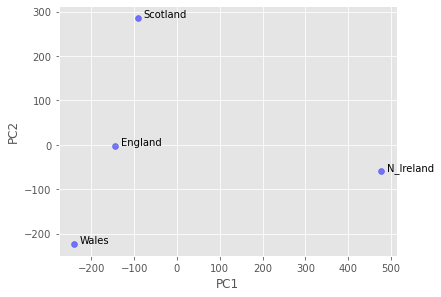

In [80]:
plt.style.use('ggplot')
plt.scatter(dfpca.PC1, dfpca.PC2, color='blue', marker='o', alpha=0.5) 
for i in range(len(dfpca2)):
    country = dfpca.loc[i,'Country']
    x = dfpca.loc[i,'PC1'] + 14
    y = dfpca.loc[i,'PC2'] + 2
    plt.annotate(country, (x,y))
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [81]:
print(pca.explained_variance_ratio_)

[0.67 0.29]


In [82]:
print("Variância Explicada")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2f} %") 
print(f"PC2: {pca.explained_variance_ratio_[1]:.2f} %")

Variância Explicada
PC1: 0.67 %
PC2: 0.29 %


## Exercício:

Aplicar PCA no dataset https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

1. usar PCA=1 e PCA=2 
2. Mostrar a Variância Explicada
3. Plotar

In [83]:
!ls

Food.xlsx
MatrizDeCovariancia.png
PCA-ReducaoDeDimencionalidade-2020.ipynb
README.md
UCI HAR Dataset
UCI HAR Dataset.names
cov.png
food-01.csv
image01.png
image02.png
wine.data
wine.names.txt


In [84]:
!ls 'UCI HAR Dataset'/train/

Inertial Signals  X_train.txt       subject_train.txt y_train.txt


In [85]:
range(561)

range(0, 561)

In [86]:
folder = 'UCI HAR Dataset/train/'
file = 'X_train.txt'
import pandas as pd
df = pd.read_csv(folder + file, delimiter=' ', header=None, usecols= list(range(561)))
len(df), len(df.columns)

(7352, 561)

In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,NaN,NaN,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,NaN,0.273372,-0.091262,-0.484347,-0.782851,-0.999865,-0.999932,-0.999973,-0.999970,-0.999930
1,NaN,NaN,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,-0.999896,-0.999885,-0.999784,-0.999782,-0.999830,-0.999899,-0.999883,-0.999783,-0.999828,-0.999908
2,NaN,NaN,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,-0.999842,-0.999864,-0.999862,-0.999674,-0.999906,-0.999831,-0.999863,-0.999676,-0.999903,-0.999954
3,NaN,NaN,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,-0.999833,-0.999893,-0.999950,-0.999948,-0.999877,-0.999860,-0.999948,-0.999946,-0.999931,-0.999989
4,NaN,NaN,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,-0.999900,-0.999917,-0.999865,-0.999918,-0.999911,-0.999908,-0.999864,-0.999933,-0.999926,-0.999993


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.0,-0.242339,0.248949,-1.000000,-0.365731,-0.172727,-0.061157,-0.002377
2,7335.0,0.275647,0.065139,-1.000000,0.263324,0.277207,0.288533,1.000000
3,6401.0,-0.023573,0.025867,-0.684893,-0.027143,-0.018097,-0.014597,0.324130
4,7297.0,-0.093994,0.067134,-1.000000,-0.117635,-0.107187,-0.088140,1.000000
...,...,...,...,...,...,...,...,...
556,6826.0,-0.726003,0.418389,-1.000000,-0.999949,-0.998551,-0.511227,0.996825
557,6863.0,-0.738842,0.409813,-1.000000,-0.999951,-0.998834,-0.551181,0.957494
558,6883.0,-0.752451,0.404505,-1.000000,-0.999954,-0.999150,-0.589103,0.849939
559,6901.0,-0.766142,0.395305,-1.000000,-0.999957,-0.999221,-0.640396,1.000000
